## DATA VISUALISATION


In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Mall_Customers.csv", encoding="ISO-8859-1")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:title={'center':'Histogram of Ages'}, xlabel='Age', ylabel='Frequency'>

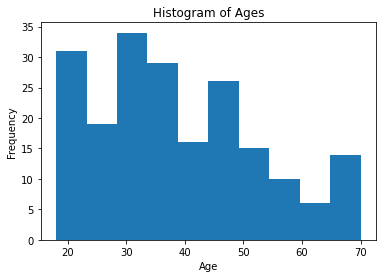

In [3]:
plt.title("Histogram of Ages")
plt.xlabel("Age")
df["Age"].plot.hist()

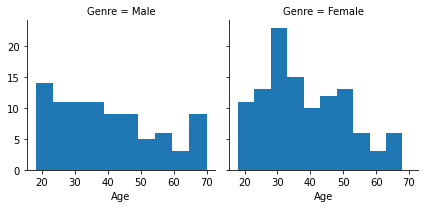

In [4]:
g=sns.FacetGrid(df,col="Genre")
g.map(plt.hist,"Age",bins=10)


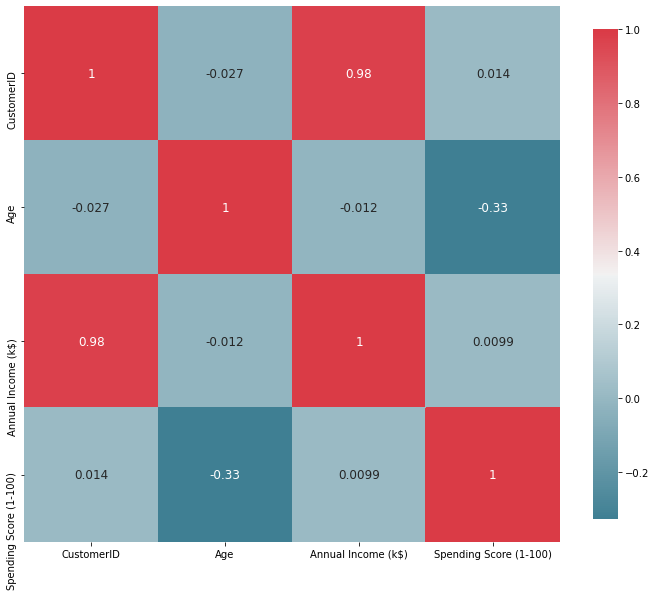

In [5]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [7]:
df[["Genre", "Spending Score (1-100)"]].groupby(["Genre"], as_index=True).mean()

,Spending Score (1-100)
Genre,
Female,51.526786
Male,48.511364


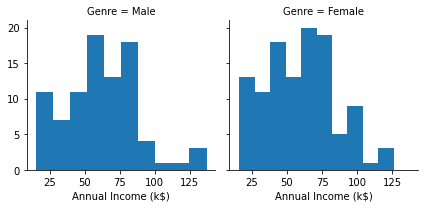

In [8]:
g=sns.FacetGrid(df,col="Genre")
g.map(plt.hist,"Annual Income (k$)",bins=10)

<AxesSubplot:title={'center':'bar plot of gender'}, xlabel='gender', ylabel='gender value count'>

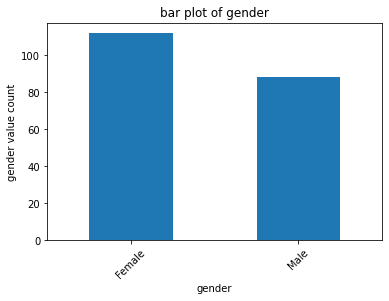

In [9]:
plt.xlabel('gender')
plt.ylabel('gender value count')
plt.title('bar plot of gender')
vc=df['Genre'].value_counts()
vc.plot.bar(rot=45)

## REGRESSION

MSE 546.7390619936562
R squared -0.09012055268504238


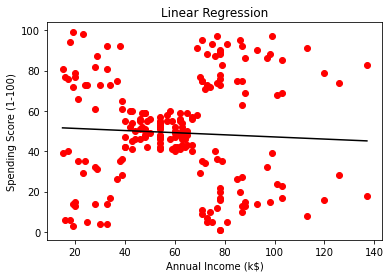

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
x=df['Annual Income (k$)'].values[:, np.newaxis]
y=df['Spending Score (1-100)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=30)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=df[['Annual Income (k$)','Age']]
y=df['Spending Score (1-100)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=30)
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 507.35100516578376
R squared -0.011586324452254715


MSE:  591.2882655248219
R squared:  -0.17894537928145704


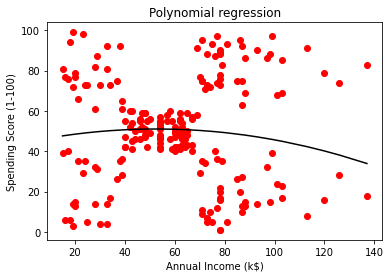

In [15]:
from sklearn.preprocessing import PolynomialFeatures
x= df["Annual Income (k$)"].values.reshape(-1,1)
y= df["Spending Score (1-100)"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

plt.scatter(x, y, color="r")
plt.title("Polynomial regression")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 


## LOGISTIC REGRESSION


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df["Genre"]=df["Genre"].map({"Female": 1, "Male": 0})
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [29]:
x = df[['Genre','Annual Income (k$)']]
y = df['Spending Score (1-100)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)   
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.05


C:\Users\Hayder\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

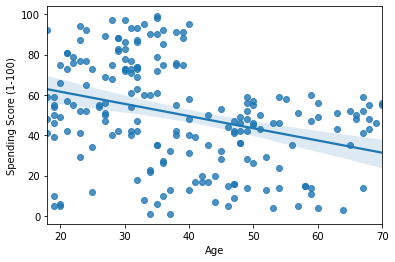

In [32]:
sns.regplot(x='Age',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

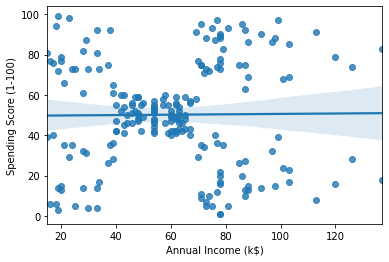

In [33]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

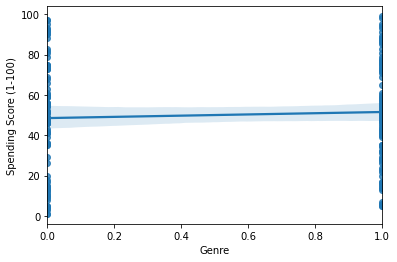

In [34]:
sns.regplot(x='Genre',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

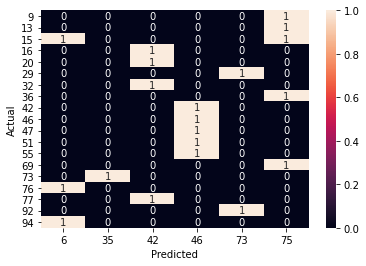

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          46       0.20      1.00      0.33         1
          47       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          75       0.00    

C:\Users\Hayder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hayder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## I don't know what's wrong with my work ( accuracy very low , incorrect confusion matrix ,..) , could you please check it and send me email 